# ITI105 - Assignment

## Import the required libraries

In [195]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
import numpy as np

## Load datasets

In [196]:
bc_dataset = load_breast_cancer()

In [197]:
type(bc_dataset)

sklearn.utils.Bunch

In [198]:
bc_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [199]:
bc_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [200]:
bc_dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [201]:
bc_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [202]:
df = pd.DataFrame(bc_dataset.data, columns=bc_dataset.feature_names)
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [203]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [204]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [205]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [206]:
# unique, counts = np.unique(bc_dataset.target, return_counts=True)
# print (counts)
bc_dataset_df_counts = pd.value_counts(bc_dataset.target)

In [207]:
print (type(bc_dataset_df_counts))
print (bc_dataset_df_counts.index)
print (bc_dataset_df_counts.values)

<class 'pandas.core.series.Series'>
Int64Index([1, 0], dtype='int64')
[357 212]


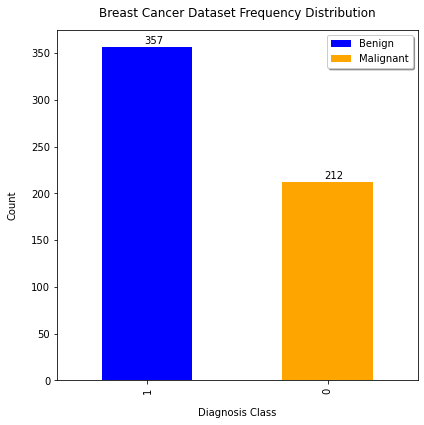

In [208]:
# Ref: https://stackoverflow.com/questions/61062641/pandas-python-legend-not-showing-all-color-categories
ax = pd.value_counts(bc_dataset.target).plot.bar(color=['blue', 'orange'], figsize=(6, 6))
ax.legend(labels=['Benign', 'Malignant'], handles=ax.patches, fancybox=True, shadow=True)
# Displays value associated with each category
for p in ax.patches:
    # ax.annotate("{:.1f}".format(p.get_height()), xy=(p.get_x() * 1.015, p.get_height() * 1.015))
    # Ref: https://thepythonguru.com/python-string-formatting/
    # ax.annotate("{:d}".format(p.get_height()), xy=(p.get_x() * 1.015, p.get_height() * 1.015), ha = 'center', va = 'center', xytext = (5, 5), textcoords = 'offset points')
    ax.annotate("{:d}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (6, 6), textcoords = 'offset points')
    
plt.xlabel("Diagnosis Class", labelpad=14)
plt.ylabel("Count", labelpad=14)

plt.title("Breast Cancer Dataset Frequency Distribution", y=1.02);

plt.savefig('bc_freq_dist')
plt.tight_layout()
plt.show()

In [209]:
X_train, X_test, y_train, y_test = train_test_split(bc_dataset.data, bc_dataset.target, test_size=0.20, stratify=bc_dataset.target, random_state=88)

## Voting

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

### Metrics

In [211]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

## KNN Pipeline with GridSearch

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# declare a two step pipeline, explicitly giving names to both steps.
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# create a dictionary of all values we want to test for n_neighbors
# Ref: https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline
# must prefix knn n_neighbors with double __ else error Invalid parameters
# There should be two underscores between estimator name and it's parameters
params_knn = {'knn__n_neighbors': np.arange(1, 25)}

# use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn_pipe, params_knn, cv=5)

# fit model to training data
knn_model = knn_gs.fit(X_train, y_train)
y_prediction_knn = knn_gs.predict(X_test)

# save best model
knn_best = knn_gs.best_estimator_

# check best n_neigbors value
print(knn_gs.best_params_)

{'knn__n_neighbors': 8}


AUC ROC score: 0.9983465608465609
Average Precision score: 0.9985458214624882
Recall score: 0.9861111111111112
auc: 0.9983465608465609
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 720x720 with 0 Axes>

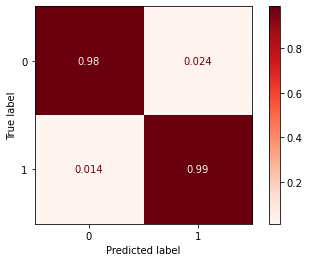

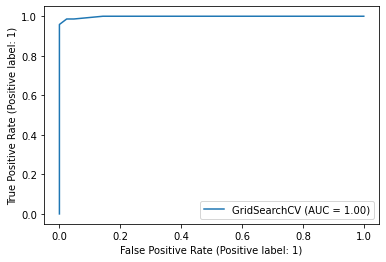

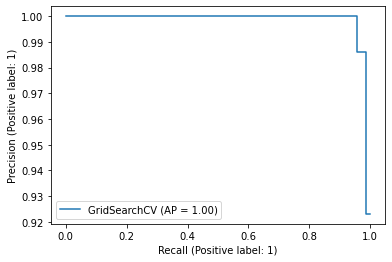

In [213]:
# print (type(knn_best))
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(knn_model, X_test, y_test, cmap='Reds', normalize='true')
plt.grid(False)

# predict output
y_prediction_knn_prob = knn_gs.predict_proba(X_test)[:, 1]

knn_roc = plot_roc_curve(knn_model, X_test, y_test)
print(f'AUC ROC score: {knn_roc.roc_auc}')

knn_precision_recall = plot_precision_recall_curve(knn_model, X_test, y_test)
# knn_precision_recall
print(f'Average Precision score: {knn_precision_recall.average_precision}')

recall_knn = recall_score(y_test, y_prediction_knn)
print(f'Recall score: {recall_knn}')

# evaluation
knn_auc = roc_auc_score(y_test, y_prediction_knn_prob)
print('auc:', knn_auc)

print(classification_report(y_test, y_prediction_knn))

## SVM Pipeline with gridsearch

In [214]:
from sklearn import svm

# Must set probability = True else predict_proba will fail, needed for auc roc computation
svm = svm.SVC(probability=True, random_state=88)
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', svm)])

# Ref: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
# Ref: https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/
params_svm = {
    'svm__C': [0.1, 0.4, 0.6, 0.8, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001]
}

# use gridsearch to test all values for n_neighbors
svm_gs = GridSearchCV(svm_pipe, params_svm, cv=5)

# fit model to training data
svm_model = svm_gs.fit(X_train, y_train)
y_prediction_svm = svm_gs.predict(X_test)

# save best model
svm_best = svm_gs.best_estimator_

#check best C and gamma value
print(svm_gs.best_params_)

{'svm__C': 10, 'svm__gamma': 0.01}


In [215]:
print ('svm_gs.score = ', svm_gs.score(X_test, y_test))

svm_gs.score =  0.9736842105263158


AUC ROC score: 0.9990079365079365
Average Precision score: 0.9994212218601648
Recall score: 0.9722222222222222
auc: 0.9990079365079365
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 720x720 with 0 Axes>

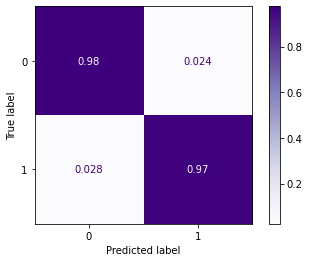

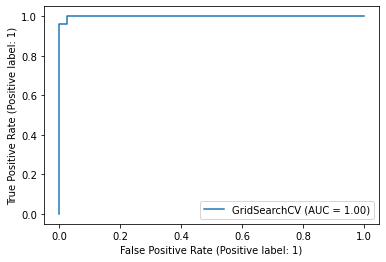

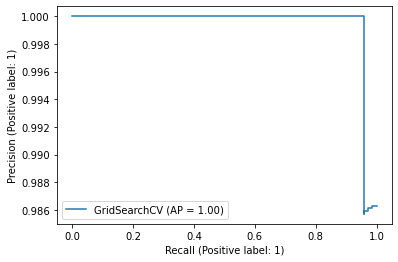

In [216]:
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(svm_model, X_test, y_test, cmap='Purples', normalize='true')
plt.grid(False)

# predict output
y_prediction_svm_prob = svm_gs.predict_proba(X_test)[:, 1]

svm_roc = plot_roc_curve(svm_model, X_test, y_test)
print(f'AUC ROC score: {svm_roc.roc_auc}')

svm_precision_recall = plot_precision_recall_curve(svm_model, X_test, y_test)
# knn_precision_recall
print(f'Average Precision score: {svm_precision_recall.average_precision}')

recall_svm = recall_score(y_test, y_prediction_svm)
print(f'Recall score: {recall_svm}')

# evaluation
svm_auc = roc_auc_score(y_test, y_prediction_svm_prob)
print('auc:', svm_auc)

print(classification_report(y_test, y_prediction_svm))

## Random Forest Classifier Pipeline with GridSearch

In [217]:
# create new a rfc pipeline
rfc_pipe = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(random_state=88))])

# create a dictionary of all values we want to test for n_estimators
params_rfc = {
    'rfc__n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# use gridsearch to test all values for n_estimators
rfc_gs = GridSearchCV(rfc_pipe, params_rfc, cv=5)

# fit model to training data
rfc_model = rfc_gs.fit(X_train, y_train)
y_prediction_rfc = rfc_gs.predict(X_test)

# save best model
rfc_best = rfc_gs.best_estimator_

# check best n_estimators value
print(rfc_gs.best_params_)

{'rfc__n_estimators': 1800}


In [218]:
#?plot_confusion_matrix
print ('rfc_gs.score = ', rfc_gs.score(X_test, y_test))

rfc_gs.score =  0.9824561403508771


AUC ROC score: 0.9983465608465608
Recall score: 0.9861111111111112
Average Precision score: 0.9990376925382796
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 720x720 with 0 Axes>

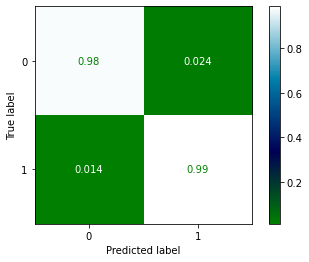

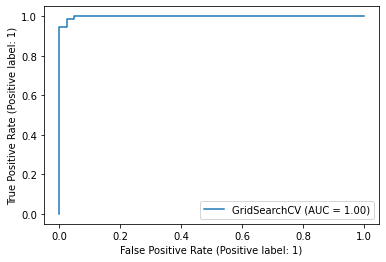

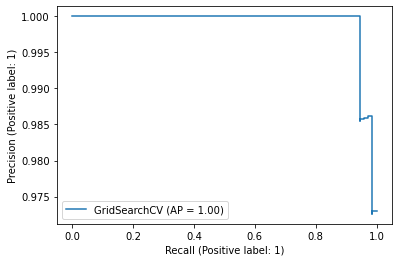

In [219]:
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(rfc_model, X_test, y_test, cmap='ocean', normalize='true')
plt.grid(False)

y_prediction_rfc_prob = rfc_gs.predict_proba(X_test)[:, 1]

rfc_roc = plot_roc_curve(rfc_model, X_test, y_test)
print(f'AUC ROC score: {rfc_roc.roc_auc}')

recall_rfc = recall_score(y_test, y_prediction_rfc)
print(f'Recall score: {recall_rfc}')

rfc_precision_recall = plot_precision_recall_curve(rfc_model, X_test, y_test)
print(f'Average Precision score: {rfc_precision_recall.average_precision}')

print(classification_report(y_test, y_prediction_rfc))

## Naive-Bayes Pipeline with GridSearch

In [220]:
# create new a nb pipeline
nb_pipe = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])

# is a stability calculation to widen (or smooth) the curve and therefore account 
# for more samples that are further away from the distribution mean. In this case, 
# np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, 
# and generates 100 samples.
params_nb = {
    'nb__var_smoothing': np.logspace(0,-9, num=100)
}

# use gridsearch to test all values for var_smoothing
nb_gs = GridSearchCV(nb_pipe, params_nb, cv=5)

# fit model to training data
nb_model = nb_gs.fit(X_train, y_train)
y_prediction_nb = nb_gs.predict(X_test)

# save best model
nb_best = nb_gs.best_estimator_

# check best var_smoothing value
print(nb_gs.best_params_)

{'nb__var_smoothing': 0.12328467394420659}


AUC ROC score: 0.9947089947089948
Recall score: 0.9722222222222222
Average Precision score: 0.9969086302516648
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 720x720 with 0 Axes>

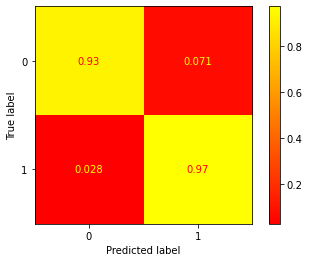

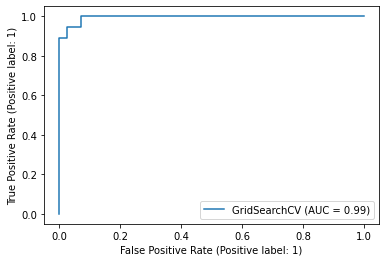

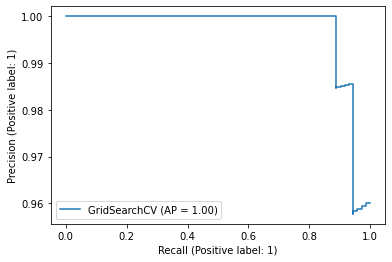

In [221]:
plt.figure(figsize=(10,10))
# confusion_matrix1 = plot_confusion_matrix(nb_best, X_test, y_test, cmap='autumn', normalize='true')
confusion_matrix = plot_confusion_matrix(nb_model, X_test, y_test, cmap='autumn', normalize='true')
plt.grid(False)

# y_prediction_nb1 = nb_best.predict(X_test)
# recall_nb1 = recall_score(y_test, y_prediction_nb1)
# print(f'Recall score: {recall_nb1}')
y_prediction_nb_prob = nb_gs.predict_proba(X_test)[:, 1]

nb_roc = plot_roc_curve(nb_model, X_test, y_test)
print(f'AUC ROC score: {nb_roc.roc_auc}')

recall_nb = recall_score(y_test, y_prediction_nb)
print(f'Recall score: {recall_nb}')



# nb_precision_recall1 = plot_precision_recall_curve(nb_best, X_test, y_test)
nb_precision_recall = plot_precision_recall_curve(nb_model, X_test, y_test)
# nb_precision_recall1
# nb_precision_recall2
print(f'Average Precision score: {nb_precision_recall.average_precision}')

print(classification_report(y_test, y_prediction_nb))

## Apply Voting

In [222]:
# create a dictionary of our models
estimators=[('knn', knn_best), ('svm', svm_best), ('rfc', rfc_best), ('nb', nb_best)]

# create our voting classifier, inputting our models
voting_soft_clf = VotingClassifier(estimators, voting='soft')

# fit model to training data
vc_soft_model = voting_soft_clf.fit(X_train, y_train)
y_prediction_vc_soft = vc_soft_model.predict(X_test)

In [223]:
# create our voting classifier, inputting our models
voting_hard_clf = VotingClassifier(estimators, voting='hard')

# fit model to training data
vc_hard_model = voting_hard_clf.fit(X_train, y_train)
y_prediction_vc_hard = vc_hard_model.predict(X_test)

AUC ROC score: 0.9993386243386243
Recall score: 0.9861111111111112
Average Precision score: 0.9996246246246245
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<Figure size 720x720 with 0 Axes>

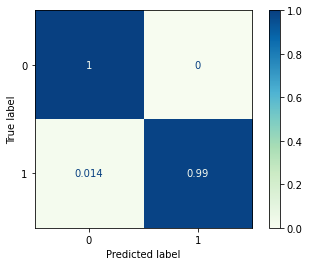

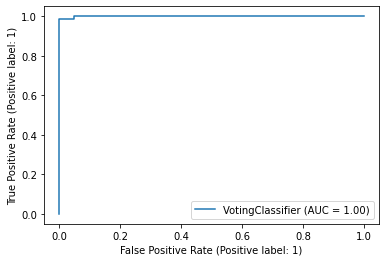

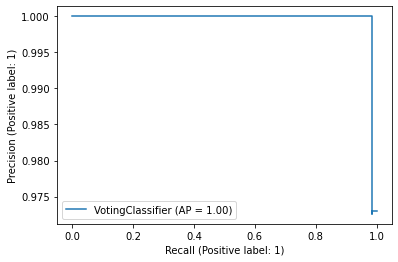

In [224]:
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(vc_soft_model, X_test, y_test, cmap='GnBu', normalize='true')
plt.grid(False)

y_prediction_vc_soft_prob = vc_soft_model.predict_proba(X_test)[:, 1]
vc_soft_roc = plot_roc_curve(vc_soft_model, X_test, y_test)
print(f'AUC ROC score: {vc_soft_roc.roc_auc}')

recall_vc_soft = recall_score(y_test, y_prediction_vc_soft)
print(f'Recall score: {recall_vc_soft}')

vc_soft_precision_recall = plot_precision_recall_curve(vc_soft_model, X_test, y_test)
# vc_precision_recall
print(f'Average Precision score: {vc_soft_precision_recall.average_precision}')

print(classification_report(y_test, y_prediction_vc_soft))

Recall score: 0.9861111111111112
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 720x720 with 0 Axes>

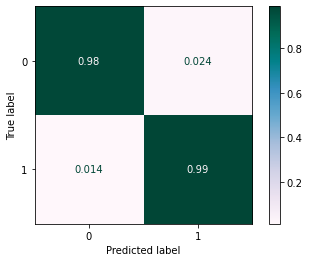

In [225]:
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(vc_hard_model, X_test, y_test, cmap='PuBuGn', normalize='true')
plt.grid(False)

# y_prediction_vc_hard_prob = vc_hard_model.predict_proba(X_test)[:, 1]
# vc_hard_roc = plot_roc_curve(vc_hard_model, X_test, y_test)
# print(f'AUC ROC score: {vc_hard_roc.roc_auc}')

recall_vc_hard = recall_score(y_test, y_prediction_vc_hard)
print(f'Recall score: {recall_vc_hard}')

# vc_hard_precision_recall = plot_precision_recall_curve(vc_hard_model, X_test, y_test)
# vc_precision_recall
# print(f'Average Precision score: {vc_hard_precision_recall.average_precision}')

print(classification_report(y_test, y_prediction_vc_hard))

In [226]:
print ('knn_gs.score = ', knn_gs.score(X_test, y_test))
print ('svm_gs.score = ', svm_gs.score(X_test, y_test))
print ('rfc_gs.score = ', rfc_gs.score(X_test, y_test))
print ('nb_gs.score = ', nb_gs.score(X_test, y_test))
print ('voting_soft.score = ', voting_soft_clf.score(X_test, y_test))
print ('voting_hard.score = ', voting_hard_clf.score(X_test, y_test))

knn_gs.score =  0.9824561403508771
svm_gs.score =  0.9736842105263158
rfc_gs.score =  0.9824561403508771
nb_gs.score =  0.956140350877193
voting_soft.score =  0.9912280701754386
voting_hard.score =  0.9824561403508771


In [227]:
data = { 
    'score' : [
               knn_gs.score(X_test, y_test), 
               svm_gs.score(X_test, y_test), 
               rfc_gs.score(X_test, y_test), 
               nb_gs.score(X_test, y_test), 
               voting_soft_clf.score(X_test, y_test),
               voting_hard_clf.score(X_test, y_test)
              ]
}

df = pd.DataFrame(data, 
                  index = ['knn', 'svm', 'rfc', 'nb', 'voting (soft)', 'voting (hard)'],
                  columns = ['score'])

df.score.index

# Ref: https://www.geeksforgeeks.org/get-the-index-of-maximum-value-in-dataframe-column/
print ('Index = ' + str(df[['score']].idxmax()))

max_score = df.score.max()
print (max_score)

# Ref: https://www.delftstack.com/howto/python-pandas/pandas-get-index-of-row/
print (df.index[df['score'] == max_score].tolist())

df.head(10)

Index = score    voting (soft)
dtype: object
0.9912280701754386
['voting (soft)']


,score
knn,0.982456
svm,0.973684
rfc,0.982456
nb,0.956140
voting (soft),0.991228
voting (hard),0.982456


## Stacking

In [228]:
from sklearn.ensemble import StackingClassifier
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

## LogisticRegression Pipeline with GridSearch Only

In [229]:
# create new a nb pipeline
lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(penalty='l2', random_state=88))])

params_lr = {
    # 'lr__penalty': ['l1', 'l2'],
    'lr__C' : [0.001,.009,0.01,.09,1,5,10,25]
}

# use gridsearch to test all values for n_neighbors
lr_gs = GridSearchCV(lr_pipe, params_lr, cv=5)

# fit model to training data
lr_model = lr_gs.fit(X_train, y_train)

y_pred = lr_gs.predict(X_test)

# save best model
lr_best = lr_gs.best_estimator_

# check best n_neigbors value
print(lr_gs.best_params_)

{'lr__C': 1}


### Apply StackingClassifier final estimator with GridSearch applied

In [230]:
# Ref: https://www.geeksforgeeks.org/stacking-in-machine-learning-2/
stack = StackingClassifier(estimators = estimators, final_estimator = lr_model, cv= 5)
stack.fit(X_train, y_train)
stack.score(X_test, y_test)

0.9649122807017544

### Applying StackingClassifier final estimator - logisticregression with default parameters

In [231]:
stack_clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(random_state=88))
sc_model = stack_clf.fit(X_train, y_train)
y_prediction_sc = sc_model.predict(X_test)
print ('Stacking Classifier: ', stack_clf.score(X_test, y_test))

Stacking Classifier:  0.9736842105263158


AUC ROC score: 0.9993386243386243
Recall score: 0.9722222222222222
Average Precision score: 0.9996168400135295
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 720x720 with 0 Axes>

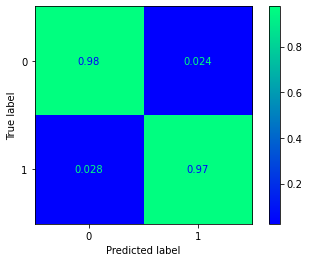

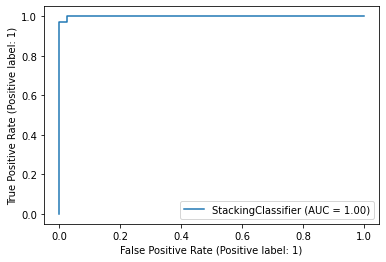

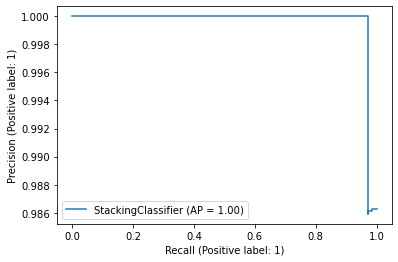

In [232]:
plt.figure(figsize=(10,10))
confusion_matrix = plot_confusion_matrix(sc_model, X_test, y_test, cmap='winter', normalize='true')
plt.grid(False)

y_prediction_sc_prob = sc_model.predict_proba(X_test)[:, 1]

sc_roc = plot_roc_curve(sc_model, X_test, y_test)
print(f'AUC ROC score: {sc_roc.roc_auc}')

recall_sc = recall_score(y_test, y_prediction_sc)
print(f'Recall score: {recall_sc}')

sc_precision_recall = plot_precision_recall_curve(sc_model, X_test, y_test)
print(f'Average Precision score: {sc_precision_recall.average_precision}')

print(classification_report(y_test, y_prediction_sc))

In [233]:
# Ref: https://stackoverflow.com/questions/46621712/add-a-new-row-to-a-pandas-dataframe-with-specific-index-name
df.loc['stacking'] = [stack_clf.score(X_test, y_test)]

In [234]:
df

,score
knn,0.982456
svm,0.973684
rfc,0.982456
nb,0.956140
voting (soft),0.991228
voting (hard),0.982456
stacking,0.973684


In [235]:
# Ref: https://www.geeksforgeeks.org/get-the-index-of-maximum-value-in-dataframe-column/
print ('Index = ' + str(df[['score']].idxmax()))

max_score = df.score.max()
print ('Max Score: ' + str(max_score))

# Ref: https://www.delftstack.com/howto/python-pandas/pandas-get-index-of-row/
print (df.index[df['score'] == max_score].tolist())

Index = score    voting (soft)
dtype: object
Max Score: 0.9912280701754386
['voting (soft)']
